# MALWARE CLASSIFICATION USING DEEP LEARNING

This notebook aims to build a Convolutional Neural Network model to perform **IMAGE BASED CLASSIFICATION OF MALWARE USING 
DEEP LEARNING** using the Maling Dataset. This dataset directly comes from the paper **Malware Images: Visualization and Automatic Classification** from L. Nataraj, S. Karthikeyan, G. Jacob and B. S. Manjunath. This model is based on the paper posted on **International Research Journal of Modernization in Engineering Technology and Science** or **www.irjmet.com**.


# Data : 
A Malware can belong to one of the following class : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

In [14]:
# set root of the file to dataRaw
root = "E:\IOMP\Malware_Classification\dataRaw"

# Preprocessing Data - coverting data into Images.

step 1 - convert .bin to .bytes

In [ ]:
input_filename = r'C:\\Users\\chimp freak\\Downloads\\data0.bin'
output_filename = 'output.bytes'

with open(input_filename, 'rb') as input_file, open(output_filename, 'w') as output_file:
    offset = 0
    bytes_per_line = 16

    while True:
        chunk = input_file.read(bytes_per_line)
        if not chunk:
            break

        output_file.write(format(offset, '08X') + ' ')

        for byte in chunk:
            output_file.write(format(byte, '02X') + ' ')

        output_file.write('\n')
        offset += bytes_per_line


Step 2 - convert .bytes to .png images.

files :  ['0A32eTdBKayjCWhZqDOQ.bytes', '0A32eTdBKayjCWhZqDOQ.bytes.png', '0ACDbR5M3ZhBJajygTuf.bytes', '0ACDbR5M3ZhBJajygTuf.bytes.png', 'output.bytes', 'output.bytes.png']
Processing 0A32eTdBKayjCWhZqDOQ.bytes
Processing 0ACDbR5M3ZhBJajygTuf.bytes
Processing output.bytes


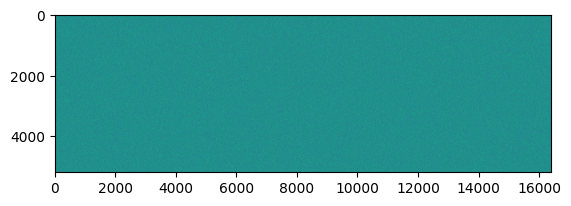

In [15]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

## This function allows us to process our hexadecimal files into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+'\\'+name+'.png', "PNG")
    return im

#Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()

Thanks to this method you are able to create your own malware images dataset !

For computation time I will not process the entire dataset and I will now focus on the **Malming dataset** in which Malwares are already set to images.

Moreover, each Malware image is set into the subfolder corresponding to its class. Thus, when creating your own training images dataset, don't forget to gather Malwares by class into subfolder before executing the next step.

# Preprocessing - Generate the dataset

Here's our new folder:

In [1]:
path_root = "E:\IOMP\Malware_Classification\data\malimg_paper_dataset_imgs"

To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : Will resize all images to the specified size. I chose (96*96) images.
  * **batch_size** : Is the size of the batch we will use. In our case, we only have 9339 images, hence setting a batch_size above this won't change anything.

In [2]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root,target_size=(96,96),batch_size=10000)

Found 9339 images belonging to 25 classes.


We can see that our 25 classes have been well recognized (thanks to our subfolders). Let's clarify this using the dictionnary.

In [3]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [7]:
imgs, labels = next(batches)

As you can see, our images are in RGB with shape 96x96 [width x length x depth].

In [8]:
imgs.shape

(9339, 96, 96, 3)

**labels** has the shape (batch_size, number of classes).

In [9]:
labels.shape

(9339, 25)

The following method allows us to plot a sample of images in our dataset.

In [10]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

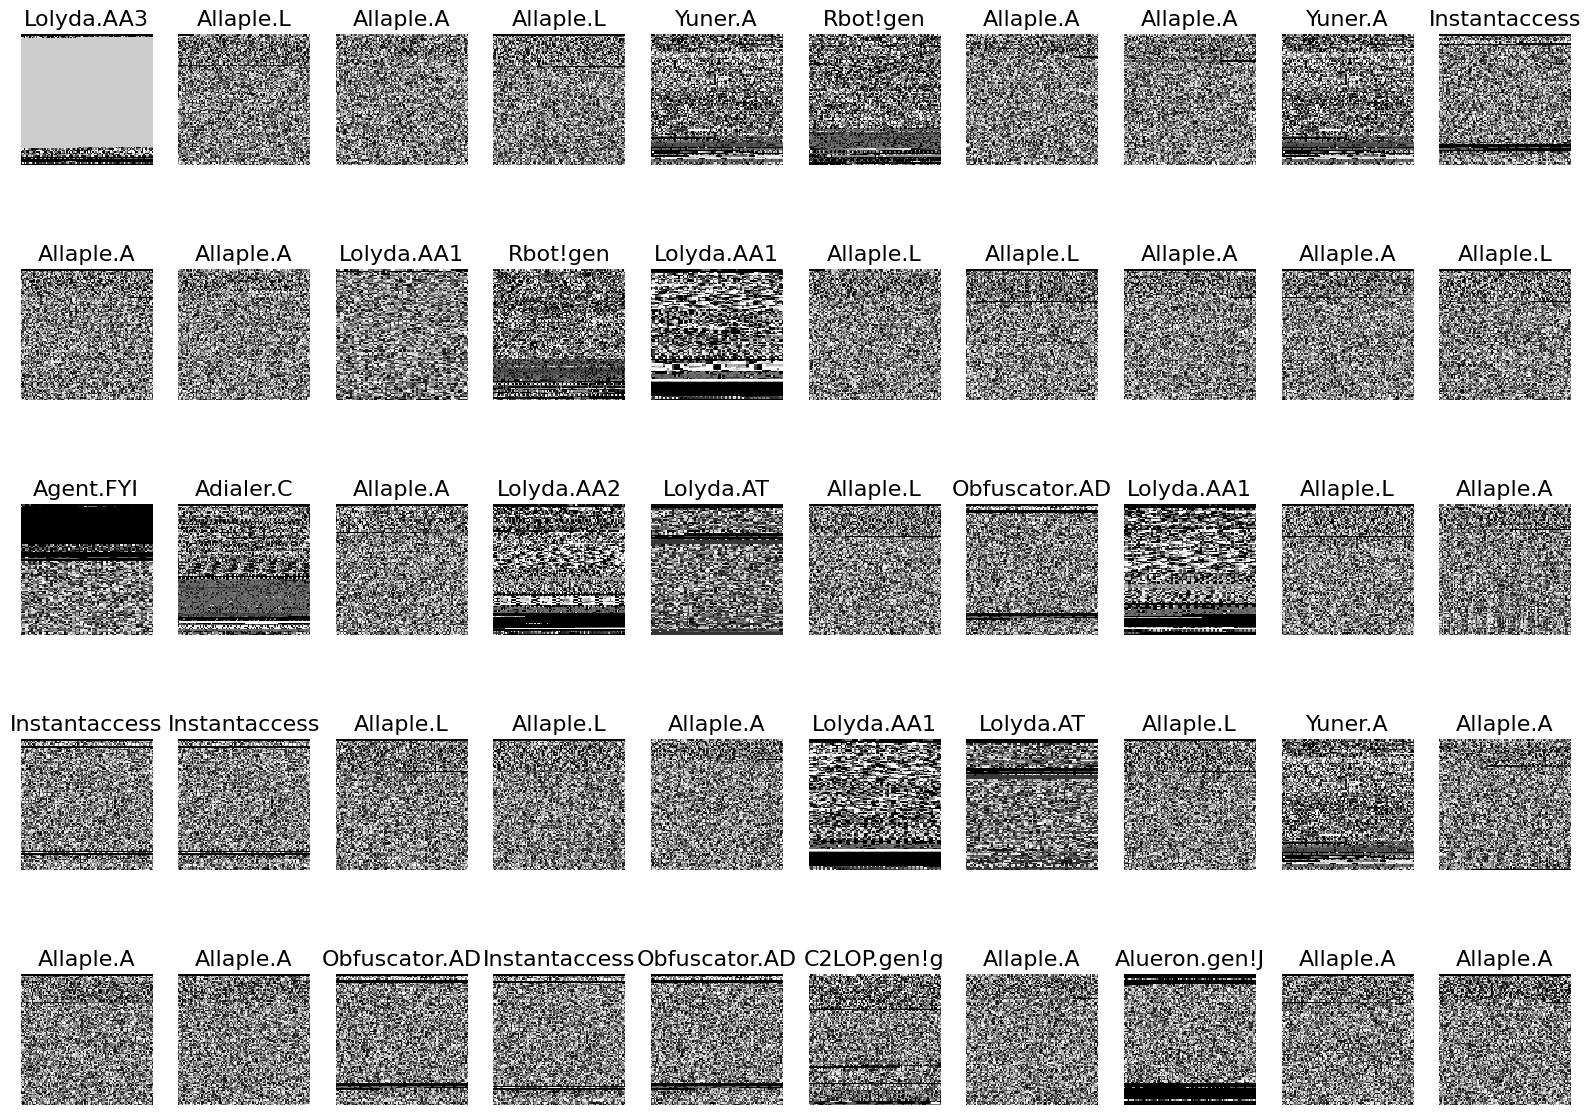

In [16]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse 

All our images are finally ready to be used. Lets check out the repartition of data between classes :

<BarContainer object of 25 artists>

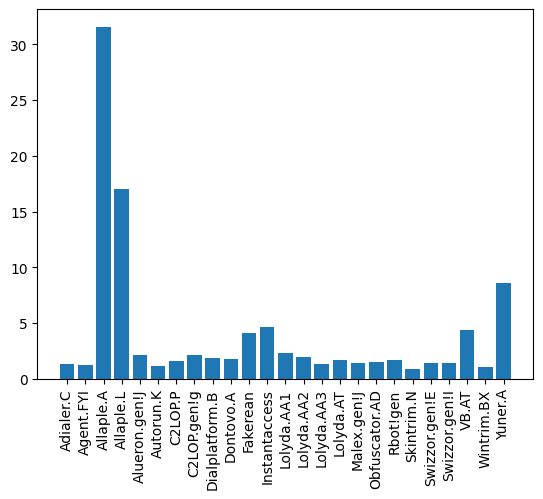

In [19]:
classes = batches.class_indices.keys()
perc = (sum(labels)/labels.shape[0])*100
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

We can see that our dataset is quite unbalanced : a lot of Malwares belong to class 2 : **Allaple.A** and class 3 : **Allaple.L** !
We will need to deal with that later. 

# Train and test

Lets split our model into train and test following a ratio 70% train - 30% test ratio.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [21]:
X_train.shape

(6537, 96, 96, 3)

In [22]:
X_test.shape

(2802, 96, 96, 3)

In [23]:
y_train.shape

(6537, 25)

In [24]:
y_test.shape

(2802, 25)

## Convolutional Neural Network Model

We will now build our **CNN** model using Keras. This model will have the following layers :

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 96 * 96 * 3

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

We want **25** classes as output.

In [27]:
num_classes = 25

Building the model

In [28]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(96,96,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [30]:
Malware_model = malware_model()
Malware_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 94, 94, 30)        840       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 47, 47, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 15)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 15)        0         
                                                                 
 flatten_1 (Flatten)         (None, 7260)             

In [31]:
y_train.shape

(6537, 25)

**class_weight** function cannot deal with one hot encoded y. We need to convert it.

In [33]:
y_train_new = np.argmax(y_train, axis=1)
y_train_new

array([15, 12,  2, ...,  3,  7, 10], dtype=int64)

In [42]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train_new),y=y_train_new)

In [44]:
class_weights_dict = {class_index: weight for class_index, weight in enumerate(class_weights)}

Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, class_weight=class_weights_dict)


Epoch 1/10
205/205 [==============================] - 30s 120ms/step - loss: 1.7916 - accuracy: 0.3641 - val_loss: 0.9218 - val_accuracy: 0.7719
Epoch 2/10
205/205 [==============================] - 26s 126ms/step - loss: 0.6956 - accuracy: 0.6769 - val_loss: 0.6165 - val_accuracy: 0.6756
Epoch 3/10
205/205 [==============================] - 25s 124ms/step - loss: 0.5127 - accuracy: 0.7652 - val_loss: 0.4175 - val_accuracy: 0.8787
Epoch 4/10
205/205 [==============================] - 25s 122ms/step - loss: 0.4131 - accuracy: 0.8068 - val_loss: 0.3624 - val_accuracy: 0.8697
Epoch 5/10
205/205 [==============================] - 26s 125ms/step - loss: 0.3472 - accuracy: 0.8426 - val_loss: 0.2114 - val_accuracy: 0.9504
Epoch 6/10
205/205 [==============================] - 27s 131ms/step - loss: 0.3111 - accuracy: 0.8709 - val_loss: 0.2348 - val_accuracy: 0.8651
Epoch 7/10
205/205 [==============================] - 25s 122ms/step - loss: 0.2462 - accuracy: 0.8813 - val_loss: 0.1985 - val_ac

In [45]:
scores = Malware_model.evaluate(X_test, y_test)

88/88 [==============================] - 2s 23ms/step - loss: 0.1466 - accuracy: 0.9647


We got **a 96% accuracy** which is crazy !

In [46]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9646680951118469


# Confusion Matrix
Lets analyse our results.

In [47]:
import numpy as np
import pandas as pd

In [51]:
y_pred_probs = Malware_model.predict(X_test, verbose=0)
y_pred_classes = y_pred_probs.argmax(axis=1)
y_pred_probs



array([[3.1850325e-09, 1.3007199e-10, 6.8055153e-05, ..., 4.6253970e-10,
        4.0298005e-09, 7.5589364e-15],
       [1.6419264e-08, 9.0149141e-09, 9.6811533e-01, ..., 5.0250183e-08,
        6.7152659e-04, 1.0351467e-09],
       [9.4820773e-10, 9.3456796e-12, 2.3106507e-07, ..., 5.9765616e-11,
        7.1672013e-10, 2.6237636e-17],
       ...,
       [4.0766654e-11, 1.4430370e-09, 1.3157240e-08, ..., 1.8491085e-12,
        2.3733448e-14, 1.6999320e-11],
       [4.4520435e-05, 1.7420277e-07, 9.6547067e-01, ..., 7.2875588e-07,
        4.2855696e-05, 6.1554179e-06],
       [1.4108914e-10, 1.7935579e-12, 2.5417066e-09, ..., 8.3415870e-12,
        2.0446939e-11, 1.9546993e-19]], dtype=float32)

In [53]:
y_test2 = np.argmax(y_test, axis=1)
y_test2

array([ 3,  2,  3, ..., 11,  2,  3], dtype=int64)

In [56]:
import numpy as np
from sklearn import metrics

# Convert predicted probabilities to predicted class labels
y_pred_classes = y_pred_probs.argmax(axis=1)

# Compute the confusion matrix
c_matrix = metrics.confusion_matrix(y_test2, y_pred_classes)


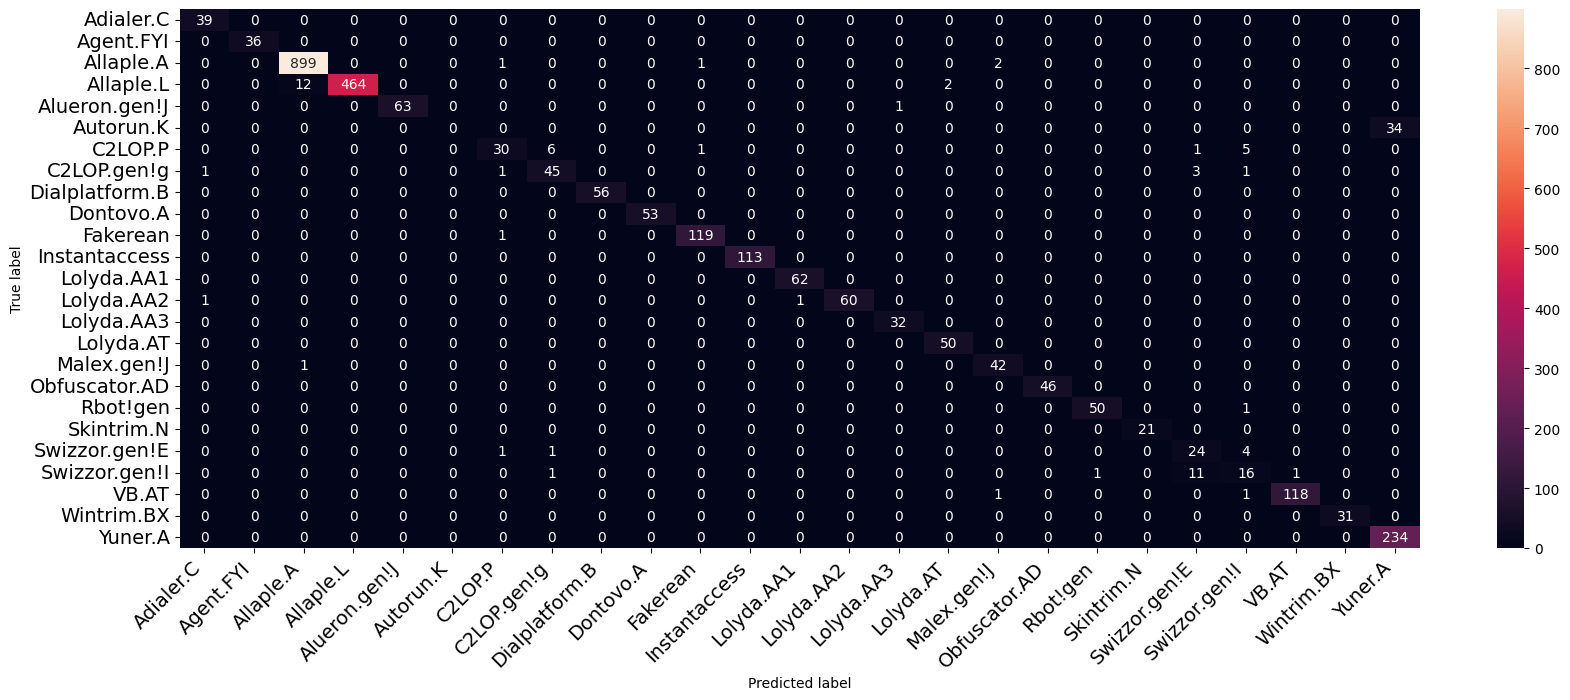

In [60]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

Here is our confusion matrix. We can observe that although most of the malwares were well classified, **Autorun.K** is always mistaken for **Yuner.A**. This is probably due to the fact that we have very few samples of **Autorun.K** in our training set. Moreover, **Swizzor.gen!E** is often mistaken with **Swizzor.gen!l**, which can be explained by the fact that they come from really close famillies and thus could have similarities in their code.